In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas.core.frame import DataFrame
from scipy import stats

In [4]:
data = pd.read_csv('data\\data.csv', sep=';')
data.head()

,Z1-4,Z5A,Z5B,Z6I,Z6IIA,Z6IIB,Z7A,Z7B,Z8A,Z8B,Z9A,Z9B,Z10A,Z10B,Z11,Z12,Z13,"Z14,15,16_x","Z14,15,16_y",Unnamed: 19
0,122.3,152.0,158.8,B,133.7,131.6,168.3,172.2,54.9,76.3,85.8,154.7,24.7,27.7,103.3,100.7,118.5,120.6,84.4,NaN
1,117.9,161.4,159.2,B,170.7,157.0,173.2,154.7,50.9,60.9,134.8,137.2,18.4,20.4,93.9,91.5,122.4,124.2,76.9,NaN
2,118.0,140.1,151.5,B,169.2,155.3,186.1,167.4,28.2,66.2,174.0,146.7,29.5,30.4,96.3,96.5,120.4,126.2,82.3,NaN
3,124.0,147.0,160.4,B,163.1,148.2,160.7,176.6,54.2,89.9,177.9,142.9,30.2,25.8,92.2,94.3,117.9,127.6,80.0,NaN
4,126.5,150.6,152.2,B,144.1,143.4,177.9,160.7,42.7,68.9,163.4,136.3,20.7,26.0,97.4,104.7,120.3,128.9,76.7,NaN


# Первичный статистический анализ

## Нахождение выборочных характеристик

In [11]:
def describe(data: np.array):
    """
    Вычисление основных описательных характеристик
    Args:
        data: данные в виде DataFrame
        column: название столбца
    """
    print('Объем выборки:', data.shape[0])
    print('Среднее значение:', data.mean())
    print('Выборочная дисперсия:', data.var())
    print('Станд. отклонение:', data.std())

    data_skew = stats.skew(data)
    if data_skew > 0:
        text_skew = "Данные отклонены левее относительно истинного нормального распределения!"
    else:
        text_skew = "Данные отклонены правее относительно истинного нормального распределения!"
    
    data_kurtosis = stats.kurtosis(data)
    if data_kurtosis > 0:
        text_kurtosis = "Большая часть данных расположена у среднего значения \
(график выше относительно истинного нормального распределения)!"
    else:
        text_kurtosis = "Большая часть данных отдаленая от среднего значения! \
(график ниже относительно истинного нормального распределения)!"
    print('Асимметрия:', data_skew)
    print(text_skew)
    print('Эксцесс:', data_kurtosis)
    print(text_kurtosis)

In [12]:
X_data = data['Z1-4'].to_numpy()
X_data = X_data[~np.isnan(X_data)]
describe(X_data)

Объем выборки: 85
Среднее значение: 121.22941176470589
Выборочная дисперсия: 6.018311418685119
Станд. отклонение: 2.453224697960853
Асимметрия: -0.16139798816918977
Данные отклонены правее относительно истинного нормального распределения!
Эксцесс: 0.7280381372680744
Большая часть данных расположена у среднего значения (график выше относительно истинного нормального распределения)!


## Построение гистограммы и функции плотности

In [9]:
def hist_pdf(data: np.array, bins: int=9, distn: str='norm'):
    """
    Построение гистограммы для оценки функции плотности
    Args:
        data: данные
        bins: число интервалов в гистограмме
    """
    data.sort()
    n = data.shape[0]
    data_mean = data.mean()
    data_std = data.std()
    data_min = data.min()
    data_max = data.max()
    
    if distn == 'norm':
        pdf_func = stats.norm.pdf
        pdf_params = (data_mean, data_std)
    elif distn == 'exp':
        pdf_func = stats.expon.pdf
        pdf_params = (0, data_mean)
    elif distn == 'uniform':
        pdf_func = stats.uniform.pdf
        pdf_params = (data_min, data_max)
    else:
        raise Exception('Distribution should be like norm, exp, uniform!')
    
    
    fig, axs = plt.subplots(1, 1, figsize=(7, 7))
    axs.set_title('Оценка функции плотности')
    freq, bords, _ = axs.hist(data, bins = bins, label='Гистограмма')
    
    rect = axs.patches
    labels = [str(int(f)) for f in freq]
    for rect, label in zip(axs.patches, labels):
        height = rect.get_height()
        axs.text(rect.get_x() + rect.get_width() / 2, height + 0.01, label, \
                ha='center', va='bottom')
    
    delta = bords[1] - bords[0]
    data_pdf = delta * n * pdf_func(data, *pdf_params)
    axs.plot(data, data_pdf, label='Функция плотности')
    axs.legend()
    plt.show()

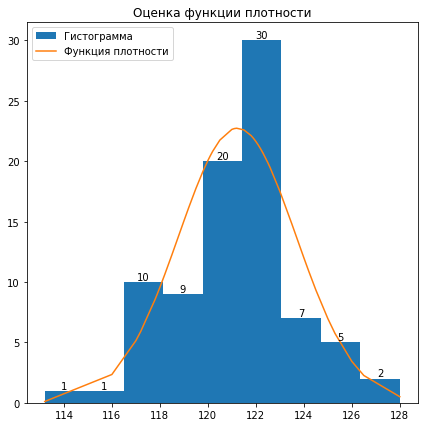

In [10]:
X_data = data['Z1-4'].to_numpy()
X_data = X_data[~np.isnan(X_data)]
hist_pdf(X_data, bins=9)

## Эмпирическая функция распределения

In [7]:
def edf_cdf(data: np.array, distn: str='norm'):
    """
    Построение ЭФР для оценки функции распределния
    Args:
        data: данные
    """
    data.sort()
    n = data.shape[0]
    data_mean = data.mean()
    data_std = data.std()
    data_min = data.min()
    data_max = data.max()
    
    if distn == 'norm':
        cdf_func = stats.norm.cdf
        cdf_params = (data_mean, data_std)
    elif distn == 'exp':
        cdf_func = stats.expon.cdf
        cdf_params = (0, data_mean)
    elif distn == 'uniform':
        cdf_func = stats.uniform.cdf
        cdf_params = (data_min, data_max)
    else:
        raise Exception('Distribution should be like norm, exp, uniform!')
    
    
    x_edf, y_edf = [data[0]], [0]
    for i in range(1, len(data)):
        f_n = sum(data < data[i]) / n
        x_edf.append(data[i - 1])
        y_edf.append(f_n)
        
        x_edf.append(data[i])
        y_edf.append(f_n)
    x_edf.append(data[-1])
    y_edf.append(1)
    
    cdf = cdf_func(data, *cdf_params)

    fig, axs = plt.subplots(1, 1, figsize=(7, 7))
    axs.set_title('Оценка функции распределения')
    axs.plot(x_edf, y_edf, label='Эмпирическая функция распределения')
    axs.plot(data, cdf, label='Функция распределения')
    axs.set_xlabel('x')
    axs.set_ylabel('F(x)')
    axs.legend()
    plt.show()

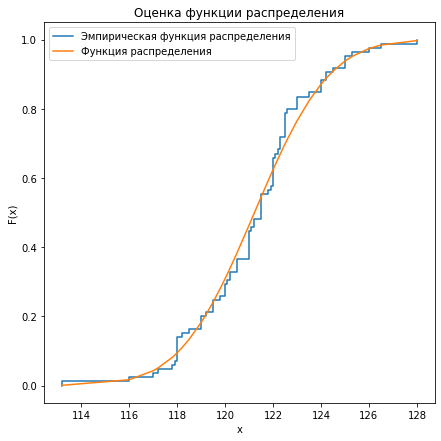

In [8]:
X_data = data['Z1-4'].to_numpy()
X_data = X_data[~np.isnan(X_data)]
edf_cdf(X_data)